# 기초세팅

In [1]:
%cd drive/MyDrive/Colab\ Notebooks/IndustrialClassification

/content/drive/MyDrive/Colab Notebooks/IndustrialClassification


## 한글 세팅

In [2]:
!sudo apt-get update -qq
!sudo apt-get install fonts-nanum* -qq

In [3]:
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [4]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

NanumBarunGothic


In [5]:
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

In [6]:
import seaborn as sns

In [7]:
sns.set(font=font_name, 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [8]:
import pandas as pd

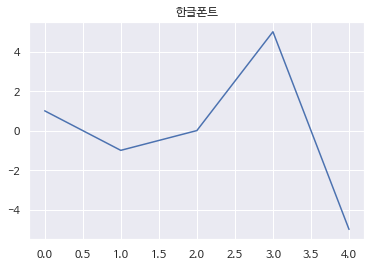

In [9]:
pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")
None

## Import

In [10]:
from typing import *
import pandas as pd
import seaborn as sns
import numpy as np

# Data load

In [14]:
df = pd.read_csv('data/dataset.csv', index_col='AI_id')

In [15]:
df

,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal
AI_id,,,,,,
id_0000001,S,95,952,카센터에서,자동차부분정비,타이어오일교환
id_0000002,G,47,472,상점내에서,일반인을 대상으로,채소.과일판매
id_0000003,G,46,467,절단하여사업체에도매,공업용고무를가지고,합성고무도매
id_0000004,G,47,475,영업점에서,일반소비자에게,열쇠잠금장치
id_0000005,Q,87,872,어린이집,보호자의 위탁을 받아,취학전아동보육
...,...,...,...,...,...,...
id_0999996,C,13,134,제품입고,워싱,청바지워싱
id_0999997,F,42,424,현장에서,고객의요청에의해,실내인테리어
id_0999998,G,47,474,영업점에서,일반소비자에게,여성의류 판매


# External tokenizer

In [14]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 5.0 MB/s 
     |████████████████████████████████| 895 kB 59.1 MB/s 
     |████████████████████████████████| 6.5 MB 32.9 MB/s 
     |████████████████████████████████| 596 kB 55.0 MB/s 
     |████████████████████████████████| 67 kB 4.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## SKT

In [15]:
from transformers import PreTrainedTokenizerFast

In [16]:
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>')

Downloading:   0%|          | 0.00/2.69M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.98k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [17]:
tokenizer.tokenize("안녕하세요. 한국어 GPT-2 입니다.😤:)l^o")

['▁안녕',
 '하',
 '세',
 '요.',
 '▁한국어',
 '▁G',
 'P',
 'T',
 '-2',
 '▁입',
 '니다.',
 '😤',
 ':)',
 'l^o']

In [21]:
type(df.text_obj[0])

str

In [24]:
tokenizer.tokenize(df.text_obj[2])

['▁절단', '하여', '사업', '체', '에도', '매']

In [32]:
tokenizer.tokenize('절단하여 사업체에 도매')

['▁절단', '하여', '▁사업', '체에', '▁도매']

In [33]:
def report_error(s: str) -> None:
  try:
    tokenizer.tokenize(s)
  except:
    print(s)

In [37]:
def tokenize(s: str)-> List[str]:
  try:
    return tokenizer.tokenize(s)
  except:
    return []

In [38]:
df['text_obj_skt'] = df.text_obj.apply(tokenize)

In [41]:
df['text_mthd_skt'] = df.text_mthd.apply(tokenize)
df['text_deal_skt'] = df.text_deal.apply(tokenize)

In [45]:
df

,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal,text_obj_skt,text_mthd_skt,text_deal_skt
AI_id,,,,,,,,,
id_0000001,S,95,952,카센터에서,자동차부분정비,타이어오일교환,"[▁카, 센터, 에서]","[▁자동차, 부분, 정비]","[▁타이어, 오, 일, 교환]"
id_0000002,G,47,472,상점내에서,일반인을 대상으로,채소.과일판매,"[▁상점, 내에서]","[▁일반, 인을, ▁대상으로]","[▁채소, ., 과일, 판매]"
id_0000003,G,46,467,절단하여사업체에도매,공업용고무를가지고,합성고무도매,"[▁절단, 하여, 사업, 체, 에도, 매]","[▁공업, 용, 고, 무를, 가, 지고]","[▁합성, 고, 무도, 매]"
id_0000004,G,47,475,영업점에서,일반소비자에게,열쇠잠금장치,"[▁영업, 점에서]","[▁일반, 소비, 자에게]","[▁열쇠, 잠, 금, 장치]"
id_0000005,Q,87,872,어린이집,보호자의 위탁을 받아,취학전아동보육,"[▁어린이, 집]","[▁보호, 자의, ▁위탁, 을, ▁받아]","[▁취학, 전, 아동, 보육]"
...,...,...,...,...,...,...,...,...,...
id_0999996,C,13,134,제품입고,워싱,청바지워싱,"[▁제품, 입, 고]","[▁워, 싱]","[▁청, 바지, 워, 싱]"
id_0999997,F,42,424,현장에서,고객의요청에의해,실내인테리어,[▁현장에서],"[▁고객의, 요, 청에, 의, 해]","[▁실내, 인, 테, 리어]"
id_0999998,G,47,474,영업점에서,일반소비자에게,여성의류 판매,"[▁영업, 점에서]","[▁일반, 소비, 자에게]","[▁여성의, 류, ▁판매]"


In [44]:
df.text_obj_skt.apply(len).value_counts()

2     508860
3     217174
4      86034
1      75268
5      53790
0      16677
6      15580
7       9092
8       5807
9       4035
10      2567
11      1703
12      1121
13       853
14       507
15       374
16       191
17       131
18        92
19        58
20        38
21        14
22        14
24         5
25         4
26         3
23         3
27         2
29         1
33         1
28         1
Name: text_obj_skt, dtype: int64

In [47]:
df.text_mthd_skt.apply(len).value_counts()

3     285968
4     228448
2     194117
5      86119
6      76793
0      43619
1      39528
7      19246
8      11515
9       7307
10      2892
11      1766
12      1053
13       614
14       352
15       215
16       156
17       102
18        65
19        34
20        30
21        17
23        16
22        13
24         4
25         3
26         3
30         2
27         1
34         1
28         1
Name: text_mthd_skt, dtype: int64

# Tokenizer

In [13]:
df.text_deal.value_counts()

화물운송서비스       45314
승객운송서비스       37877
종교서비스         10590
부동산중개서비스       7106
숙박서비스          3738
              ...  
사무행정 써비스          1
전자부품,LED램프        1
우유배달 도매           1
냉장고,에어컨TV         1
한식(미역구)판매         1
Name: text_deal, Length: 289691, dtype: int64

In [14]:
ws_tokens = df.text_deal.apply(lambda s: s.replace('a/s', ' 수리 ').replace('/', ' ').replace('?', ' ').replace('？', ' ').replace('&', ' ').replace(',', ' ').replace('，', ' ').replace('.', ' ').replace('．', ' ').replace('및', ' ').replace('등', ' ').replace('각종', ' 각종 ').replace('관련', ' 관련 ').replace('서비스', ' 서비스').replace('교육', ' 교육 ').replace('운송', ' 운송').replace('관리', ' 관리 ').replace('판매', ' 판매').replace('운영', ' 운영').replace('의류', ' 의류').replace('부품', ' 부품 ').replace('제품', ' 제품 ').replace('제조', ' 제조 ').replace('제작', ' 제작').replace('제공', ' 제공 ').replace('소매', ' 소매 ').replace('도매', ' 도매 ').replace('시설', ' 시설').replace('(', ' ').replace(')', ' ').replace('을 위한', ' ').replace('를 위한', ' ').replace('을위한', ' ').replace('를위한', ' ').split(' ') if s is not np.nan else []).explode().value_counts()

In [15]:
ws_tokens

             498870
서비스          172909
판매           102640
운송            86741
제공            49587
              ...  
운송장비용pack         1
치킨배달위주            1
카드업무              1
싸인채널              1
미역구               1
Name: text_deal, Length: 107558, dtype: int64

In [16]:
ws_tokens[ws_tokens < 3]

염장고          2
홀딩           2
사업본부         2
애완용개사료       2
사무대행         2
            ..
운송장비용pack    1
치킨배달위주       1
카드업무         1
싸인채널         1
미역구          1
Name: text_deal, Length: 85789, dtype: int64

In [116]:
ws_tokens.to_csv('data/ws_tokens.csv')

In [93]:
tokens = df.text_deal.apply(lambda s: s.replace('?', '').replace('&', ' ').replace(',', ' ').replace('.', ' ').replace('및', ' ').replace('등', ' ').replace('각종', ' 각종 ').replace('서비스', ' 서비스').replace('교육', ' 교육 ').replace('운송', ' 운송').replace('관리', ' 관리 ').replace('판매', ' 판매').replace('운영', ' 운영').replace('의류', ' 의류').replace('부품', ' 부품 ').replace('제품', ' 제품 ').replace('제조', ' 제조 ').replace('제공', ' 제공 ').replace('소매', ' 소매 ').replace('도매', ' 도매 ').replace('(', ' ').replace(')', ' ').replace('을 위한', ' ').replace('를 위한', ' ').replace('을위한', ' ').replace('를위한', ' ') if s is not np.nan else s).apply(tokenize).explode().apply(lambda s: s.replace('▁', '') if s is not np.nan else s).value_counts()

In [96]:
tokens

       485742
서비스    173141
판매     103462
운송      88626
제공      49588
        ...  
산출          1
훅           1
개발에         1
산업별         1
상위          1
Name: text_deal, Length: 9545, dtype: int64

In [94]:
tokens.to_csv('skt_tokens.csv')

In [86]:
df.text_deal_skt.explode().value_counts()

서비스    156749
운송      87308
판매      64623
,       56970
▁화물     48103
        ...  
능(          1
름에          1
▁깎          1
▁실제         1
▁상위         1
Name: text_deal_skt, Length: 12942, dtype: int64

In [11]:
class DealTokenizer:
  def __init__(self):
    
    self.changer = {'a/s':' 수리 '}
    self.separators = ['/', '?', '？', '&', ',', '，', '.', '．', '(', ')', '및', '등', '를', '을 위한', '을위한', '를 위한', '를위한']
    self.pre_tokens = ['각종', '관련', '서비스', '교육', '운송', '관리', '판매', '운영', '의류', '부품', '제품', '제조', '제작', '제공', '소매', '도매', '시설']

  def change(self, s: str) -> str:
    for asis, tobe in self.changer.items():
      s = s.replace(asis, tobe)
    return s

  def separate(self, s: str) -> str:
    for seq in self.separators:
      s = s.replace(seq, ' ')
    return s
  
  def extract_pre_tokens(self, s: str) -> str:
    for token in self.pre_tokens:
      s = s.replace(token, f' {token} ')
    return s

  def replace(self, s: str) -> str:
    return self.extract_pre_tokens(self.separate(self.change(s)))

  def tokenize(self, s: str) -> List[str]:
    return self.replace(s).split() if s is not np.nan else []


In [28]:
tokenizer = DealTokenizer()

In [16]:
toks = df.text_deal.apply(tokenizer.tokenize)

In [17]:
toks

AI_id
id_0000001        [타이어오일교환]
id_0000002     [채소, 과일, 판매]
id_0000003       [합성고무, 도매]
id_0000004         [열쇠잠금장치]
id_0000005        [취학전아동보육]
                  ...      
id_0999996          [청바지워싱]
id_0999997         [실내인테리어]
id_0999998     [여성, 의류, 판매]
id_0999999           [필라테스]
id_1000000    [한식, 미역구, 판매]
Name: text_deal, Length: 1000000, dtype: object

In [20]:
toks = toks.explode().value_counts()

In [21]:
toks[toks > 100]

서비스     174101
판매      103486
운송       88627
제공       49587
화물       47635
         ...  
로또복권       101
냉동기        101
발레         101
내부         101
장치         101
Name: text_deal, Length: 1610, dtype: int64

In [33]:
toks.to_csv('data/toks_v1.csv')

In [26]:
pre_toks = list(toks[toks > 100].index)

In [29]:
tokenizer.pre_tokens += pre_toks

In [30]:
new_toks = df.text_deal.apply(tokenizer.tokenize).explode().value_counts()

In [31]:
new_toks

서비스       174101
판매        103486
운송         88627
기          86702
물          81425
           ...  
규결화한           1
노동자이익향         1
봉투만듬           1
대생             1
양채류-양          1
Name: text_deal, Length: 30583, dtype: int64

In [34]:
new_toks.to_csv('data/toks_v2.csv')